# Case :- Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used for introductory classification tasks.

IRIS FLOWER CLASSIFICATION

• The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("IRIS.csv")

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


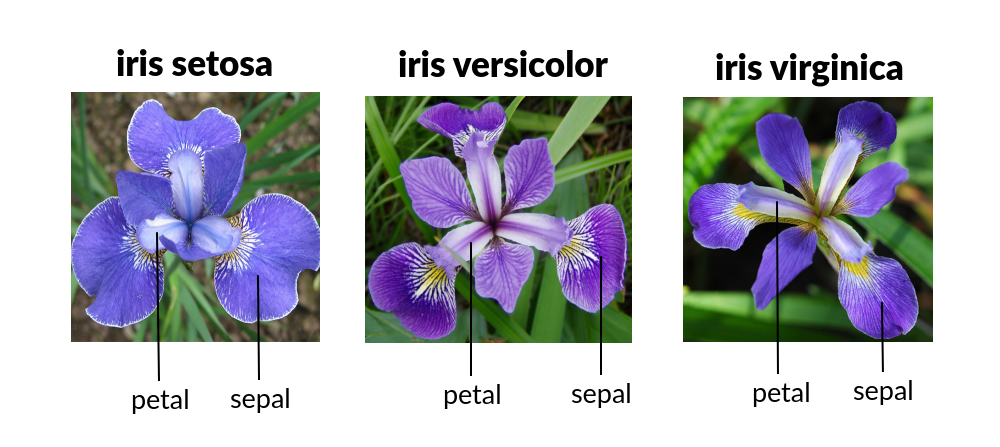

## Domain Analysis

#### The dataset is a CSV file which contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species)

#### Class (Iris Setosa, Iris Versicolour, Iris Virginica)

#### sepal_length :-each of the parts of the calyx of a flower, enclosing the petals and typically green and leaflike. Sepal length of all the 3 classes mentioned above.

#### sepal_width :- Sepal width of all the 3 classes mentioned above.

#### petal_length :- each of the segments of the corolla of a flower, which are modified leaves and are typically coloured. Petal length of all the 3 classes mentioned above.

#### petal_width :- petal width of all the 3 classes mentioned above.

#### species :- A species is a class of plants or animals whose members have the same main characteristics and are able to breed with each other.


## Basic Checks

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### 1)There are no constant value present in the dataset.
#### 2)No Missing values seen in the dataset.
#### 3)Maximum petal and sepal length are  6.9 and 7.9 respectively.
#### 4)Maximum petal and sepal width are  2.5 and 4.4 respectively

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Data consists of datatype float with 4 attribute and object with 1 attribute.

In [9]:
data.describe(include='O')

,species
count,150
unique,3
top,Iris-setosa
freq,50


#### There are 3 unique values in Species.
#### (Iris Setosa, Iris Versicolour, Iris Virginica)
#### Top species mentioned in the dataset is Iris-setosa

In [10]:
data.shape

(150, 5)

#### data consists of 150 rows and 5 columns.

In [11]:
data.size

750

## Exploratory Data Analysis

### Univariate analysis


In [11]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


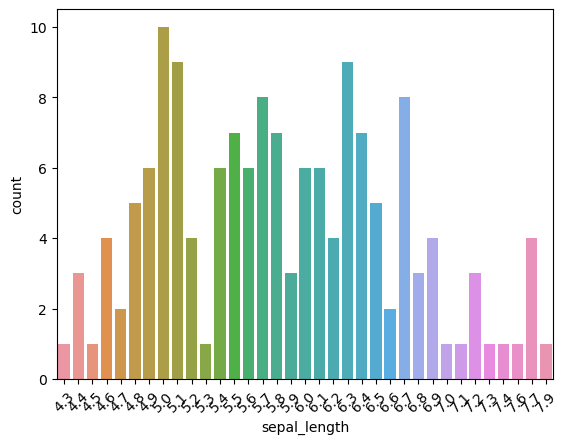

In [12]:
#univariate analysis of sepal_length 
sns.countplot(x='sepal_length', data=data)
plt.xticks(rotation=45)
plt.show()

#### Sepal length has 23% of distinct values. Sepal length ranges between value 4.30 to 7.90 

#### The distribution is skewed by 0.315 at the right.

#### According to the distrubtion the sepal length values mostly lies between 5 to 6.8

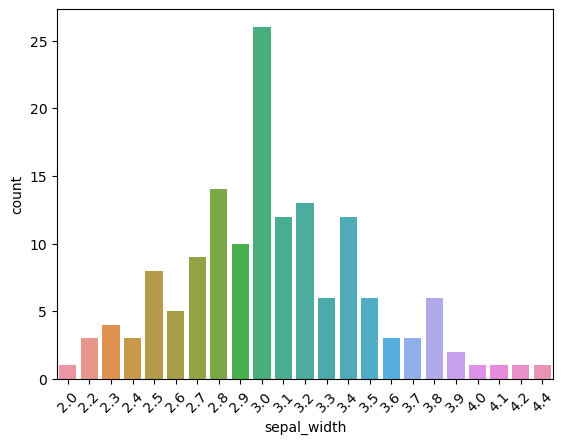

In [13]:
#univariate analysis of sepal_width
sns.countplot(x='sepal_width', data=data)
plt.xticks(rotation=45)
plt.show()

#### Sepal width has 15% of distinct values. Sepal width ranges between value 2 to 4.40 

#### The distribution is skewed by 0.334 at the right. with a kutrtosis of 0.291

#### According to the distrubtion the sepal length values mostly lies between 2.8 to 3.4

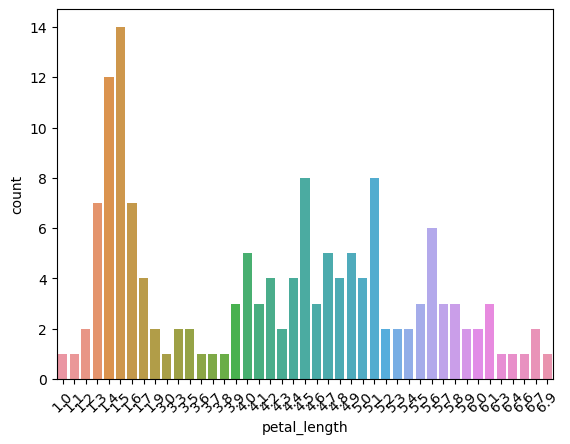

In [14]:
#univariate analysis of petal_length 
sns.countplot(x='petal_length', data=data)
plt.xticks(rotation=45)
plt.show()

#### Petal length has 29% of distinct values. Petal length ranges between value 1 to 6.90 

#### The distribution is negatively skewed.

#### Petal with length  more than 6 are less in number.

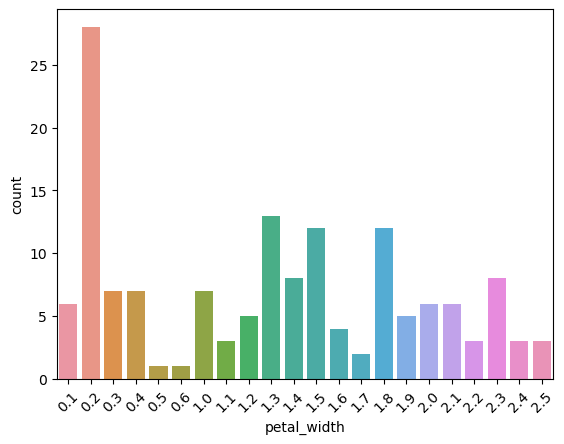

In [15]:
#univariate analysis of petal_width 
sns.countplot(x='petal_width', data=data)
plt.xticks(rotation=45)
plt.show()

#### Petal width has 15% of distinct values. Petal width ranges between value 0.10 to 2.50 

#### The distribution is negetively skewed with kurtosis of -1.34

#### According to the distrubtion the Petal width with 0.2 are seen the most in the dataset.

<AxesSubplot:title={'center':'Species'}>

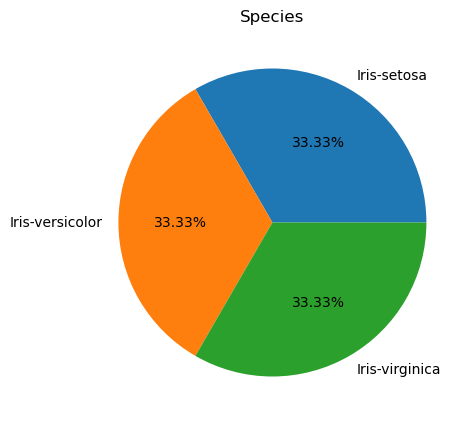

In [16]:
plt.figure(figsize=(15,5))
data['species'].value_counts().plot(kind='pie',autopct='%0.2f%%',ylabel='',title='Species')


#### 3 distinct values

#### 3 of the classes are divided equally having 33% of data in each class.
#### That is 50 values for each class.

###  Bivariate analysis

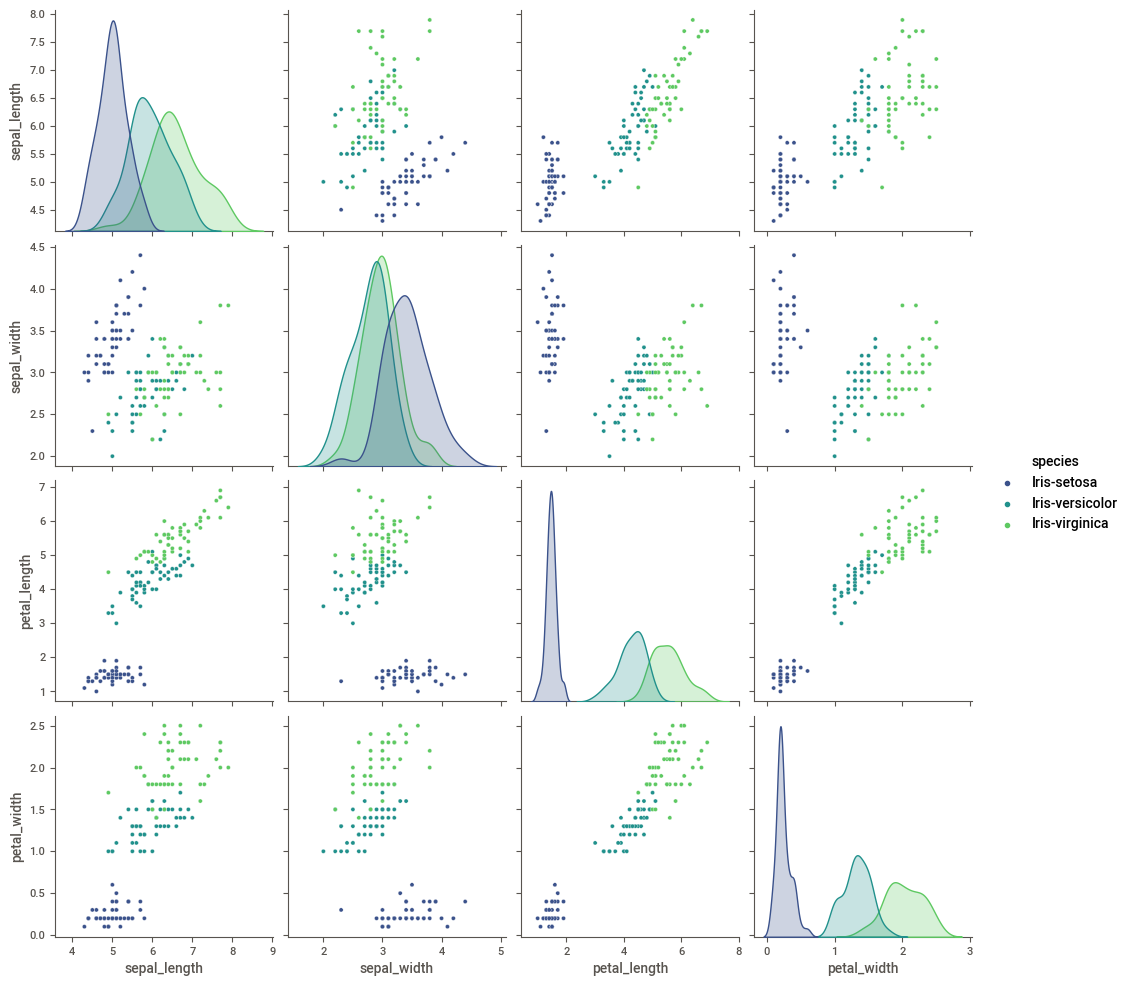

In [17]:
V = sns.color_palette("viridis", n_colors=3)
sns.pairplot(data,hue='species',palette=V)
plt.show()


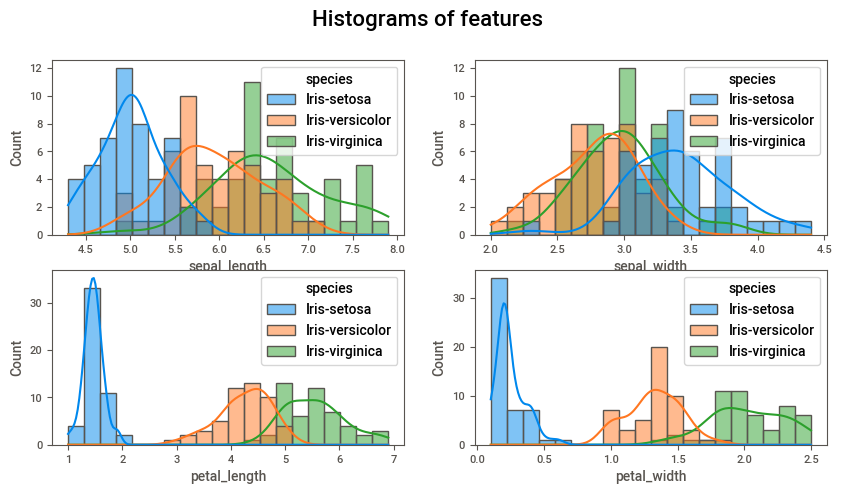

In [18]:
num_columns = list(data.select_dtypes(include=['float']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(10,5))
for j in range(num):
    for i in range(num):
        try:
            sns.histplot(data=data,x=num_columns[0],kde=True,bins=20,hue='species',ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of features', fontsize=16)
plt.show()


#### Sepal length of Iris virginica is the largest followed by  versicolor. Iris Setosa has the smallest sepal length among all the three.

#### Sepal width of Iris setosa is the largest followed by  virginica. Iris versicolor have smallest sepal width among all the three species.

#### Petal length of Iris setosa range between 1 and 2 which is the smallest. whereas the petal length of virginica  is large ranges from 4 to 7. Followed by versicolor from range 3 to 5.

#### Petal width of of Iris setosa lies between 0 to 0.5 which is the smallest.

#### Petal width off versicolor and virginica lies between 1 to 2 and 1.5 to 2.5 respectively.

#### sepal length, petal length and petal width of virginica is  largest of all, whereas sepal width of setosa is largest.




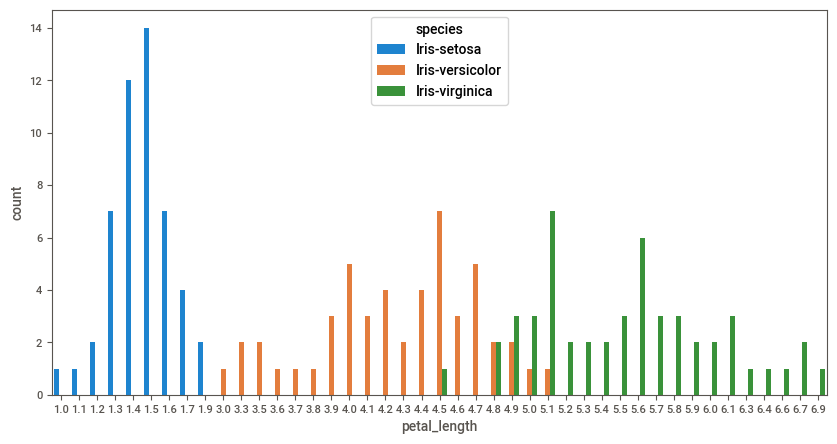

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x="petal_length", data=data, hue="species")
plt.show()


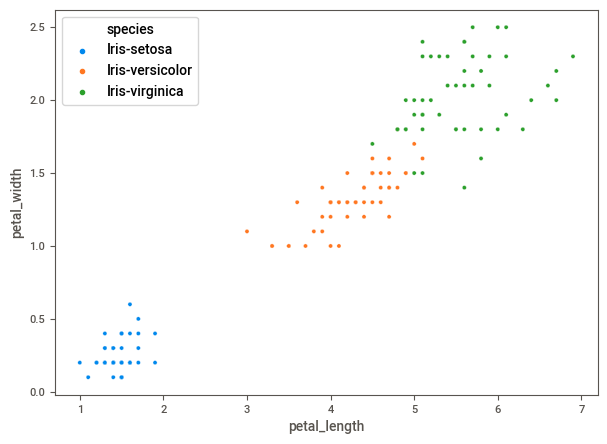

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="petal_length", y="petal_width", data=data, hue="species")
plt.show()


#### Iris setosa has small petal_length as well as small petal width

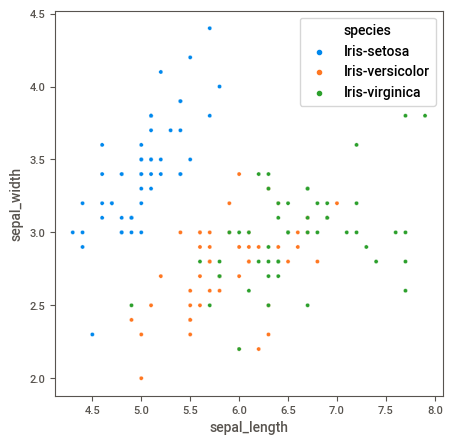

In [21]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="sepal_length", y="sepal_width", data=data, hue="species")
plt.show()


In [22]:
#create correlation matrix
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


#### A Pearson Correlation Coefficient is a way to quantify the linear relationship between two variables.

#### We can use the corr() function in pandas to create a correlation matrix:

#### The correlation coefficient turns out to be 0.891. This indicates a strong positive correlation between petal_width and petal_length.

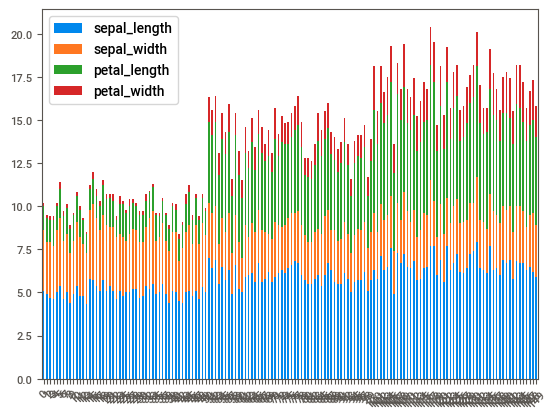

In [23]:
data.plot.bar(stacked=True)
plt.xticks(rotation=45)
plt.show()


## Data Preprocessing Pipeline


In [8]:
## Checking missing values

data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#####  Converting the catogerical data into Numerical.

In [9]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [11]:
#converting Embarked variable
data.species=data.species.map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})

In [12]:
data.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1


### Checking outliers in the data 

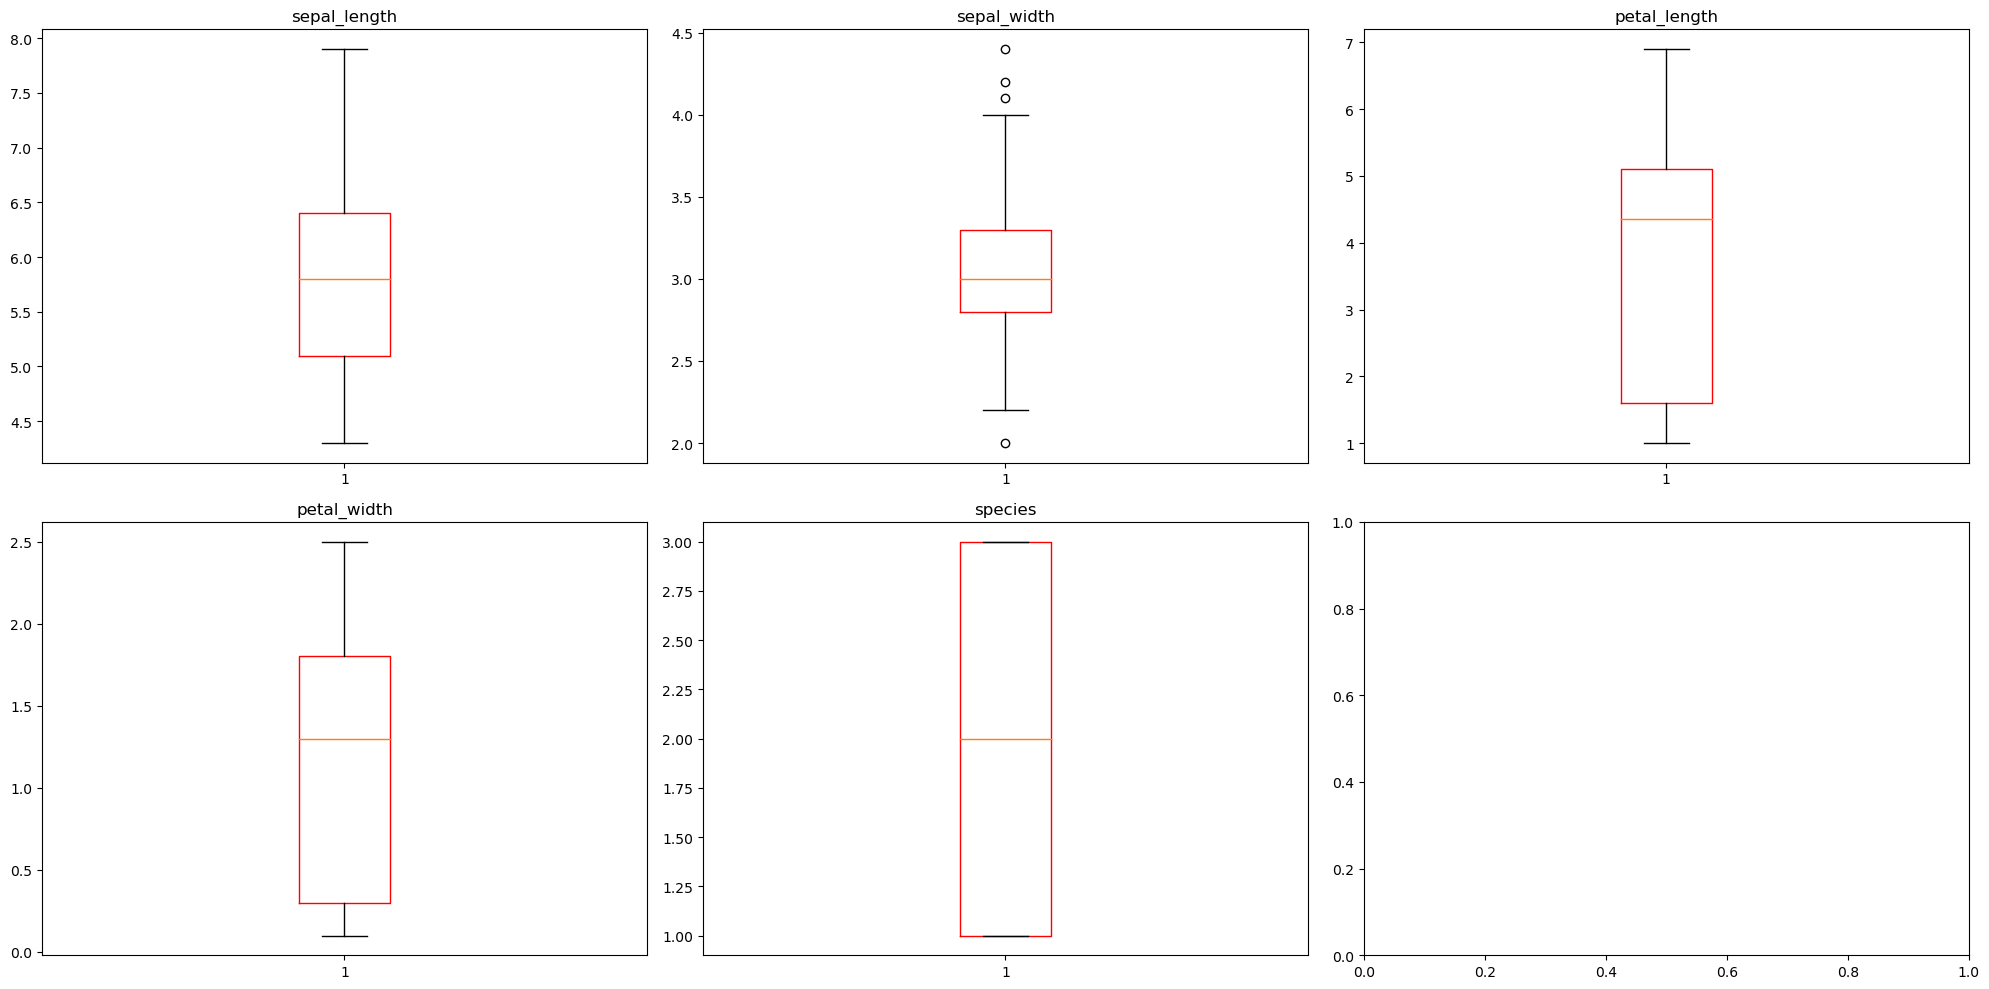

In [13]:
numeric_cols = data.select_dtypes(include=[float, int]).columns
num_plots = len(numeric_cols)
num_cols = 3  # number of columns per row
num_rows = int(np.ceil(num_plots/num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))

for i, col_name in enumerate(numeric_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].boxplot(data[col_name], boxprops=dict(color='red'))
    axes[row, col].set_title(col_name)


plt.tight_layout()  # adjust subplot spacing
plt.show()

#### Only column sepal width consits of  outliers.

##### Sepal_width

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


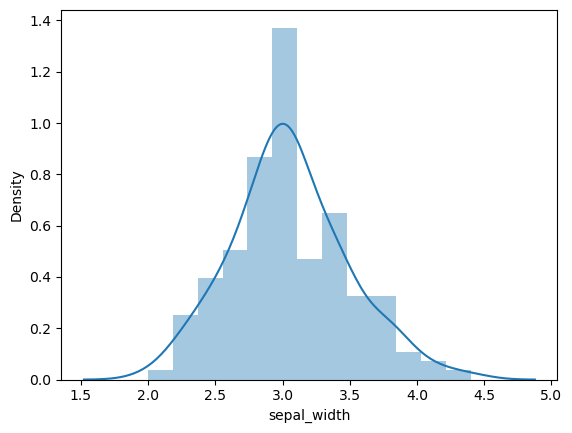

In [14]:
#Checking the distribution of sepal_width
sns.distplot(data.sepal_width)
plt.show()


#### The distribution is normally distributed. 

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


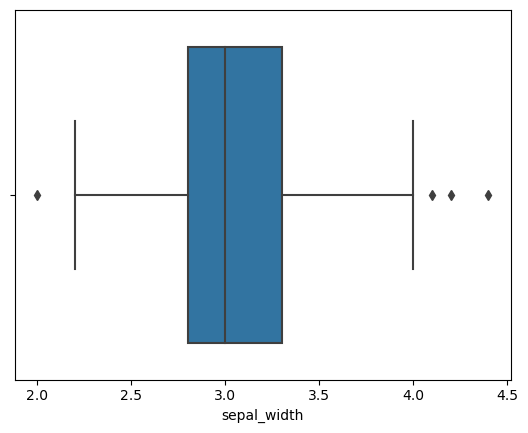

In [15]:
sns.boxplot(data.sepal_width)
plt.show()

#### outliers present in the max limit and min_limit

In [16]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.sepal_width,interpolation='midpoint')
IQR
Q1=data.sepal_width.quantile(0.25)
Q3=data.sepal_width.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [17]:
#Checking outliers in the max limit
data.loc[data['sepal_width']>max_limit]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,1
32,5.2,4.1,1.5,0.1,1
33,5.5,4.2,1.4,0.2,1


In [18]:
#Checking outliers in the max limit
data.loc[data['sepal_width']<min_limit]

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,2


In [19]:
# Handling the outliers with the help of median.
data.loc[data['sepal_width']>max_limit,'sepal_width']=np.median(data.sepal_width)

In [20]:
# Handling the outliers with the help of median.
data.loc[data['sepal_width']<min_limit,'sepal_width']=np.median(data.sepal_width)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


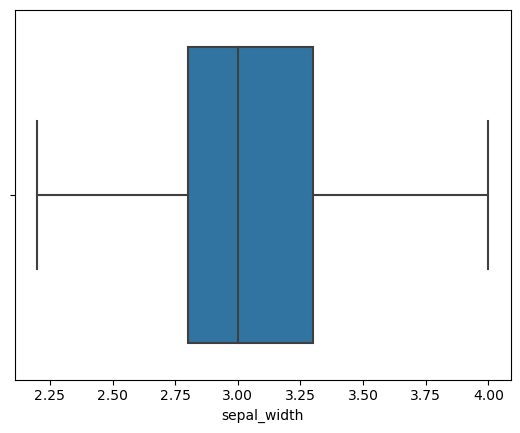

In [21]:
sns.boxplot(data.sepal_width)
plt.show()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


All the outliers are handled.

## Feature Selection

<AxesSubplot:>

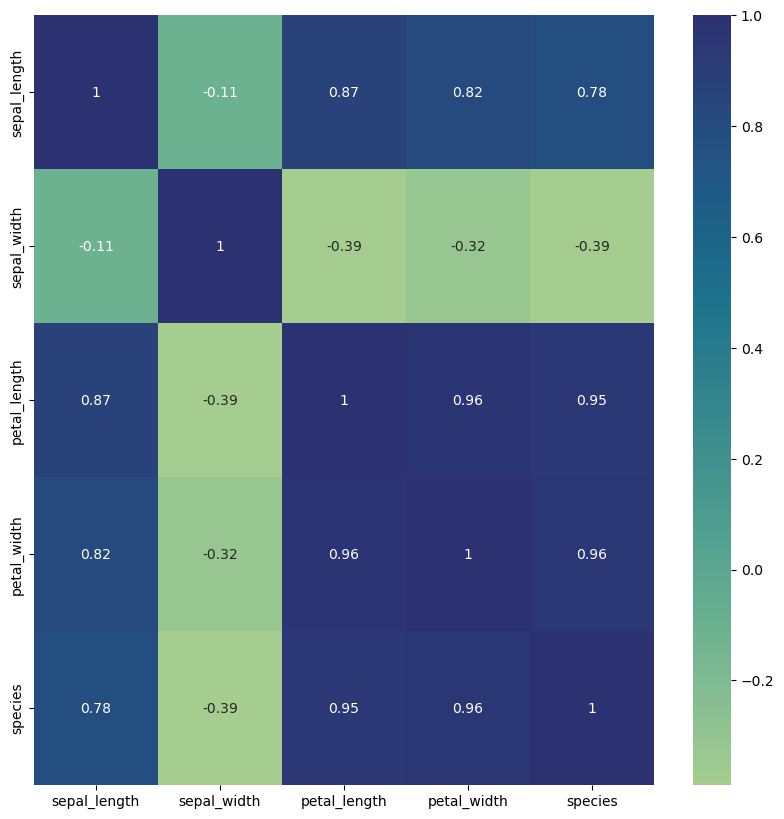

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(),annot=True,cmap = "crest")

### With the help of heatmap we can see that there is correlation between petal width and petal length as they are crossing the threshold that is 0.9 

### Therefore dropping one of the attribute

In [24]:
data.drop(['petal_width'],axis=1,inplace=True)


In [25]:
## Checking duplicate in the data 
data.duplicated().sum()
#there are 38 duplicate

7

In [26]:
# Drop duplicate rows
data = data.drop_duplicates()


In [27]:
data.duplicated().sum()


0

In [28]:
data.head()

,sepal_length,sepal_width,petal_length,species
0,5.1,3.5,1.4,1
1,4.9,3.0,1.4,1
2,4.7,3.2,1.3,1
3,4.6,3.1,1.5,1
4,5.0,3.6,1.4,1


### scaling

In [29]:
#scaling when algorithms which calulate distance and numerical data
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler() #object creaction
data[['sepal_length','sepal_width','petal_length']]
mn.fit_transform(data[['sepal_length','sepal_width','petal_length']])


array([[0.22222222, 0.72222222, 0.06779661],
       [0.16666667, 0.44444444, 0.06779661],
       [0.11111111, 0.55555556, 0.05084746],
       [0.08333333, 0.5       , 0.08474576],
       [0.19444444, 0.77777778, 0.06779661],
       [0.30555556, 0.94444444, 0.11864407],
       [0.08333333, 0.66666667, 0.06779661],
       [0.19444444, 0.66666667, 0.08474576],
       [0.02777778, 0.38888889, 0.06779661],
       [0.16666667, 0.5       , 0.08474576],
       [0.30555556, 0.83333333, 0.08474576],
       [0.13888889, 0.66666667, 0.10169492],
       [0.13888889, 0.44444444, 0.06779661],
       [0.        , 0.44444444, 0.01694915],
       [0.41666667, 1.        , 0.03389831],
       [0.38888889, 0.44444444, 0.08474576],
       [0.30555556, 0.94444444, 0.05084746],
       [0.38888889, 0.88888889, 0.11864407],
       [0.22222222, 0.88888889, 0.08474576],
       [0.30555556, 0.66666667, 0.11864407],
       [0.22222222, 0.83333333, 0.08474576],
       [0.08333333, 0.77777778, 0.        ],
       [0.

In [30]:
data.head()

,sepal_length,sepal_width,petal_length,species
0,5.1,3.5,1.4,1
1,4.9,3.0,1.4,1
2,4.7,3.2,1.3,1
3,4.6,3.1,1.5,1
4,5.0,3.6,1.4,1


## Model Creation

In [24]:
## creating independent and dependent variables
X = data.drop('species',axis =1)
y = data['species']


In [25]:
## creating training and testing data for Logistic Regression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=43)

# Logistic Regression

Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class. 


In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Fitting my model to the train file

logreg.fit(X_train,y_train)


LogisticRegression()

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score,ConfusionMatrixDisplay

#### Traning score

In [28]:
ylk_pred=logreg.predict(X_train)
ylk_pred

array([3, 3, 2, 2, 3, 3, 1, 2, 2, 1, 2, 3, 2, 3, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 3, 1, 3, 3, 2, 3, 3, 3, 1, 3, 1, 1, 3, 1, 1, 2, 1, 2, 3, 1, 1,
       3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 2, 2, 1, 1, 1, 1, 3, 1, 3, 2, 3, 2,
       2, 1, 3, 1, 3, 2, 2, 3, 3, 2, 2, 1, 2, 2, 2, 3, 3, 1, 1, 3, 3, 3,
       2, 1, 3, 2, 2, 3, 3, 1, 3, 2, 3, 2, 2, 1, 2, 1, 2, 2, 3],
      dtype=int64)

In [29]:
score=f1_score(y_train,ylk_pred,average='weighted')
score

0.9624886026897653

In [30]:
a=accuracy_score(y_train,ylk_pred)
a

0.9626168224299065

#### Testing score

In [31]:
LR_y_train_predict=logreg.predict(X_test)
LR_y_train_predict

array([2, 2, 3, 2, 2, 1, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 3, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 1, 1, 3, 3], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,LR_y_train_predict) * 100


97.22222222222221

In [33]:
recall=recall_score(y_test,LR_y_train_predict,average='weighted')
recall

0.9722222222222222

In [34]:
precision=precision_score(y_test,LR_y_train_predict,average='weighted')
precision

0.9756944444444444

In [35]:
f1score=f1_score(y_test,LR_y_train_predict,average='weighted')
f1score

0.9727272727272727

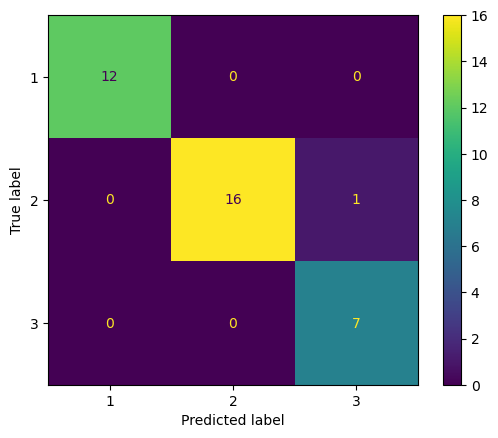

In [36]:
cm = confusion_matrix(y_test, LR_y_train_predict, labels=logreg.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
display.plot()


# Support Vector Machine

SVM is a powerful supervised algorithm that works best on smaller datasets but on complex ones. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks, but generally, they work best in classification problems.


In [37]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters ###onject creation
svclassifier.fit(X_train , y_train)#traning of the classifier

SVC()

In [38]:
# Predict output for X_test
y_hat1=svclassifier.predict(X_test)
y_hat1

array([2, 2, 3, 2, 2, 1, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 3, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 1, 1, 3, 3], dtype=int64)

In [39]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc_svm=accuracy_score(y_test,y_hat1)
acc_svm

0.9722222222222222

In [40]:
recall_svm=recall_score(y_test,y_hat1,average='weighted')
recall_svm

0.9722222222222222

In [41]:
pre_svm=precision_score(y_test,y_hat1,average='weighted')
pre_svm

0.9756944444444444

In [42]:
# F1 score considers both Precision and Recall for evaluating a model
f1=f1_score(y_test,y_hat1,average='weighted')
f1

0.9727272727272727

In [43]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 

print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.94      0.97        17
           3       0.88      1.00      0.93         7

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier, X, y, cv=5, scoring='f1_macro')
scores

array([0.92962963, 1.        , 0.82949702, 0.92962963, 0.96451914])

## KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier#USING KNN

error_rate = []
# Will take some time
for i in range(1,11):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    pred_i = KNN.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

In [46]:
from sklearn.neighbors import KNeighborsClassifier#USING KNN
KNN1=KNeighborsClassifier() ## model object creation
KNN1.fit(X_train,y_train)  ## fitting the model
y_hat_knn=KNN1.predict(X_test)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [47]:
y_predict_KNN=KNN.predict(X_test)
y_predict_KNN

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([2, 2, 3, 2, 2, 1, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 3, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 1, 1, 3, 3], dtype=int64)

##### Traning score

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
y_train_KNN=KNN.predict(X_train)
f1_train=f1_score(y_train,y_train_KNN,average='weighted')
f1_train

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9626168224299065

#### Testing score


In [49]:
## Checking the outputs
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
f1_KNN=f1_score(y_test,y_predict_KNN,average='weighted')
f1_KNN

0.9727272727272727

In [50]:
re_KNN=recall_score(y_test,y_predict_KNN,average='weighted')
re_KNN

0.9722222222222222

In [51]:
pr_KNN=precision_score(y_test,y_predict_KNN,average='weighted')
pr_KNN

0.9756944444444444

In [52]:
cr_bgg=classification_report(y_test,y_predict_KNN)
print(cr_bgg)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.94      0.97        17
           3       0.88      1.00      0.93         7

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



# DecisionTree 

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.


In [53]:
from sklearn.tree import DecisionTreeClassifier
#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()
#object creation for decision tree  
dt.fit(X_train ,y_train)
#training the model
y_hat=dt.predict(X_test)#prediction
y_hat#predicted values 

array([2, 2, 3, 2, 2, 1, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 3, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 1, 1, 3, 3], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
test_acc=accuracy_score(y_test,y_hat)#testing accuracy 
test_acc

0.9722222222222222

In [55]:
## test score
test_f1=f1_score(y_test,y_hat,average='weighted')#f1 score
test_f1

0.9727272727272727

In [56]:
P_score=precision_score(y_test,y_hat,average='weighted')
P_score   

0.9756944444444444

In [57]:
re_sco=recall_score(y_test,y_hat,average='weighted')
re_sco

0.9722222222222222

In [58]:
print(classification_report(y_test,y_hat))# for  testing 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.94      0.97        17
           3       0.88      1.00      0.93         7

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



# Random Forest 

Random forest is a commonly-used machine learning algorithm , which combines the output of multiple decision trees to reach a single result. It handles both classification and regression problems.


In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X, y, cv=5, scoring='f1_macro')
scores

array([0.89355742, 0.96658312, 0.86531987, 0.96491228, 0.84920635])

In [60]:
from sklearn.ensemble import RandomForestClassifier#importing randomforestclassifier as it is a classification task

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)#training the data

RandomForestClassifier()

In [61]:
yy_predict=rf_clf.predict(X_test)#testing

In [62]:
from sklearn.metrics import classification_report,f1_score,recall_score,precision_score,classification_report

In [63]:
f_Score=f1_score(y_test,yy_predict,average='weighted')
f_Score

0.9727272727272727

In [64]:
test=recall_score(y_test,yy_predict,average='weighted')#checking accuracy
test

0.9722222222222222

In [65]:
PS=precision_score(y_test,yy_predict,average='weighted')#checking 
PS

0.9756944444444444

In [66]:
ACCURACY=accuracy_score(y_test,yy_predict)#checking 
ACCURACY

0.9722222222222222


# Business Problem

| Model               | F1 Score | Accuracy score  |
|-------------------- |----------|-----------------|
| Logistic Regression | 97%      | 97%             | 
| KNN                 | 97%      | 97%             |
| SVM                 | 97%      | 97%             | 
| Decision Tree       | 97%      | 97%             |
| Random Forest       | 97%      | 97%             |


### 5 different algorithms are used to create a good model.

### All the algorithms are giving good score.

### Algorithm used - 

####    1.Logistic Regression - It is performing very good in both trainig and testing. It is giving F1 score as 97% 

####    2.KNN - Perforrming very wellin both training and testing with a F1 score of 97%

####   3.SVM - Perforrming very well with a F1 score of 97%

####   4.Decision Tree -  Perforrming very well with a F1 score of 97%

####   5.Random Forest - Perforrming very well with a F1 score of 97%

#### We can use any of the algorthim for this dataset as all the model are performing good.